In [64]:
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16, 12)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import six
import statistics as stats
from collections import Counter

In [ ]:
def generateCorrelationGraph(df):
    domSize = df.DOMSize.values
    totalTime = df.totalTime.values

    #generates correlation graph
    fig, ax = plt.subplots()
    plt.scatter(domSize, totalTime)
    ax.set_xlabel("DOM Size (nodes)", fontsize = 16)
    ax.set_ylabel("Total Time to Collect Evidence (ms)", fontsize =16)
    plt.title("Total Time Taken to Collect Evidence (ms) Vs. DOM Size (nodes)", fontsize =22)
    plt.grid(False)
    fig.text(0.1,0.05, "Collected On Sunday 31st of March 2019")
    fig.savefig("./area_vs_price.png",dpi = 100)

In [ ]:
generateCorrelationGraph(df_timings)

In [67]:
def returnStatistics(type_statistic, df):
    new_df = None
    if type_statistic == 'max':
        new_df = df.groupby(['DOMSize']).max()
        new_df.reset_index(drop=False, inplace=True)
    elif type_statistic == 'min':
        new_df = df.groupby(['DOMSize']).min()
        new_df.reset_index(drop=False, inplace=True)
    elif type_statistic == 'mean':
        new_df = df.groupby(['DOMSize']).mean()
        new_df.reset_index(drop=False, inplace=True)
    elif type_statistic == 'mode':
        new_df = findMode(df)
    elif type_statistic == 'median':
        new_df = findMedian(df)
    return new_df

In [68]:
def findMode(df):
    typeOfReadings = ['captureEvidence','sendBackground','packEvidence','sendEvidence','saveEvidence','totalTime']
    domSizes = df.DOMSize.unique()
    newDF = []
    for sizeOfDOM in domSizes:
        newData = [sizeOfDOM]
        for typeOfReading in typeOfReadings:            
            sub_df = df.loc[df['DOMSize']==sizeOfDOM]
            #check counts to see if there are multiple values with the same count
            #if there are, we sort them and take the median of the values with same count
            newData.append(checkMode(Counter(sub_df[typeOfReading]).most_common()))
        newDF.append(newData)
    return pd.DataFrame(newDF, columns=['DOMSizes']+typeOfReadings)

In [69]:
def checkMode(listOfTuples):
    duplicate_tuples = [listOfTuples[0][0]]
    maxCount = listOfTuples[0][1]
    for i in range(1,len(listOfTuples)):
        if listOfTuples[i][1] == maxCount:
            duplicate_tuples.append(listOfTuples[i][0])
        else:
            break
    if len(duplicate_tuples) > 1:
        return stats.median(sorted(duplicate_tuples))
    else:
        return duplicate_tuples[0]

In [70]:
def findMedian(df):
    typeOfReadings = ['captureEvidence','sendBackground','packEvidence','sendEvidence','saveEvidence','totalTime']
    domSizes = df.DOMSize.unique()
    newDF = []
    for sizeOfDOM in domSizes:
        newData = [sizeOfDOM]
        for typeOfReading in typeOfReadings:            
            sub_df = df.loc[df['DOMSize']==sizeOfDOM]
            newData.append(stats.median(sub_df[typeOfReading].sort_values()))
        newDF.append(newData)
    return pd.DataFrame(newDF, columns=['DOMSizes']+typeOfReadings)


In [71]:
#https://stackoverflow.com/questions/26678467/export-a-pandas-dataframe-as-a-table-image

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='k',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax


In [72]:
def saveStatistics(type_statistic, df):
    statistics = returnStatistics(type_statistic, df)
    render_mpl_table(statistics, header_columns=1, col_width=4.0)
    plt.savefig('./Visualizations/'+type_statistic+'.png')

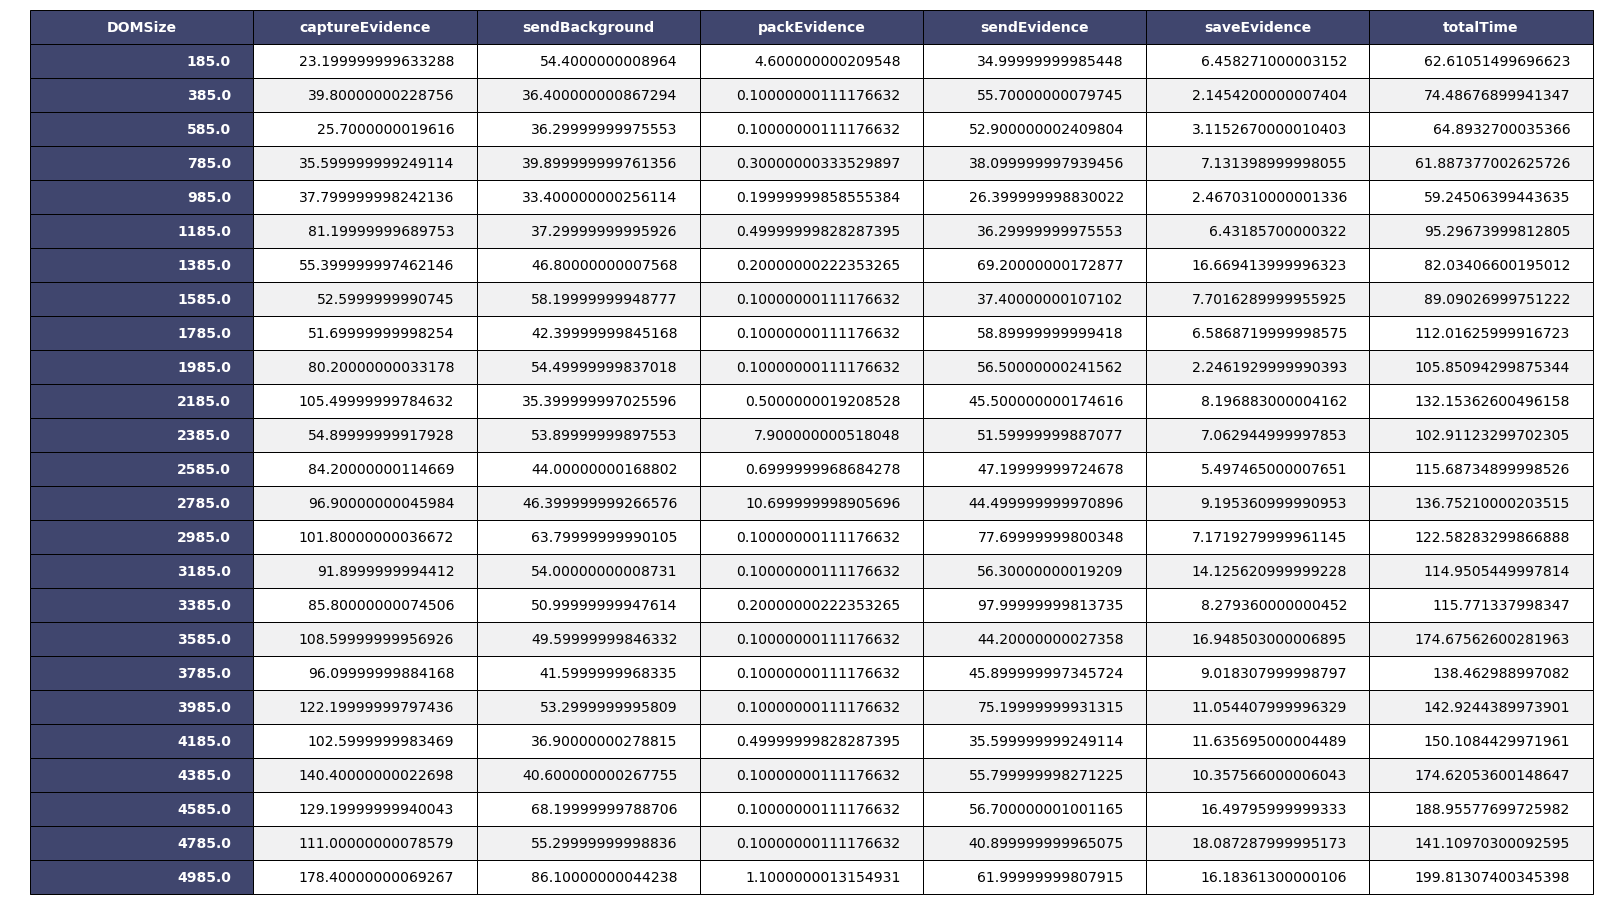

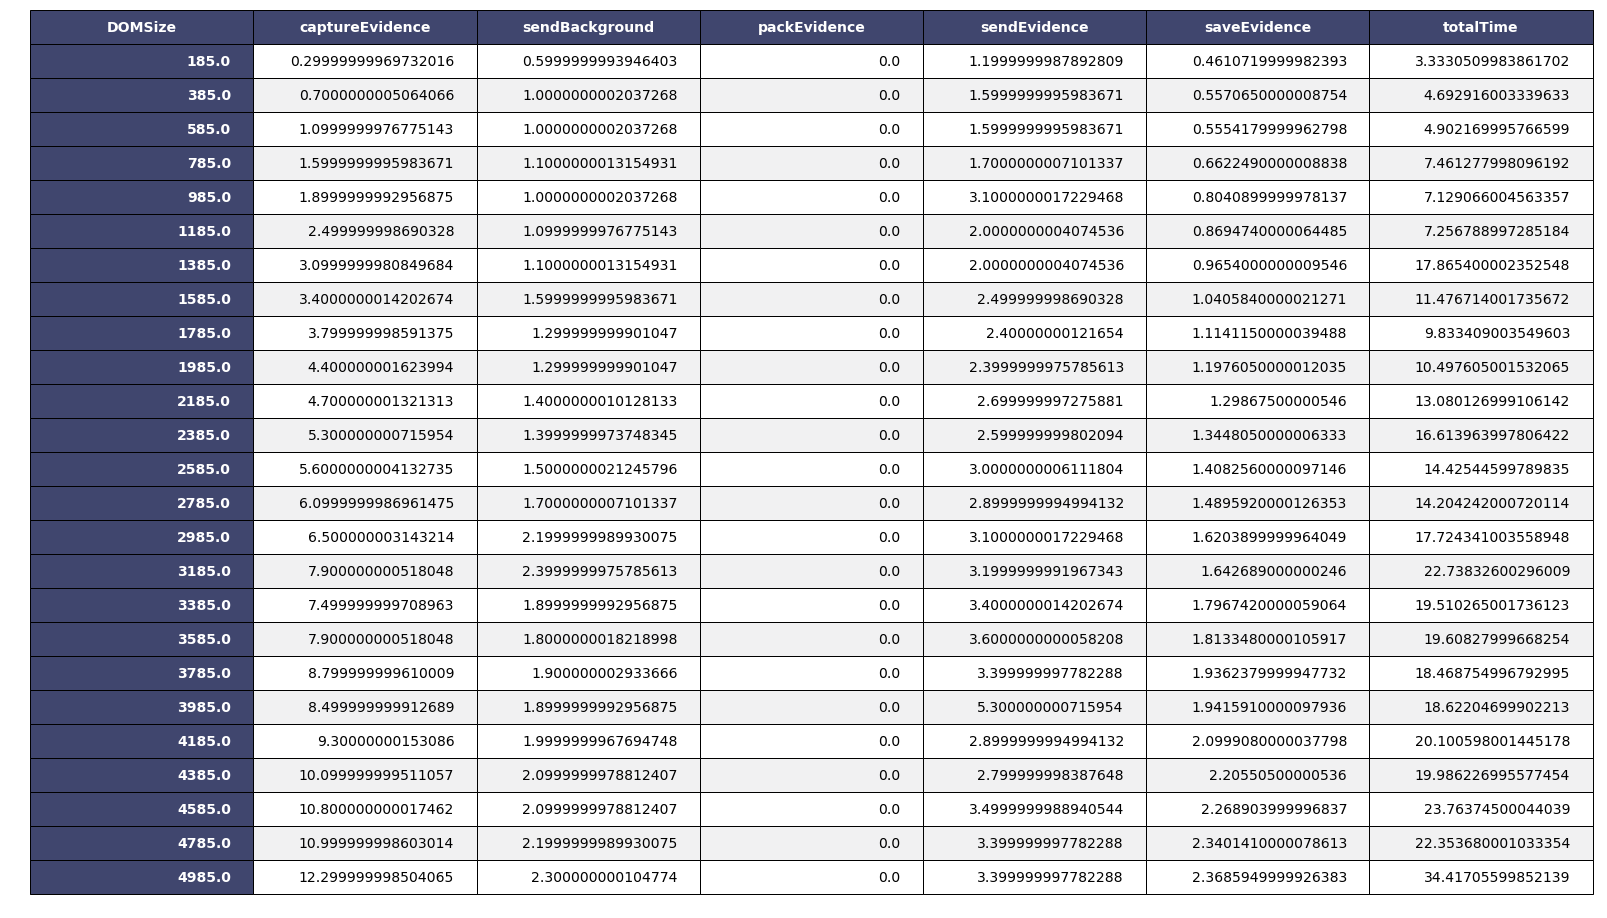

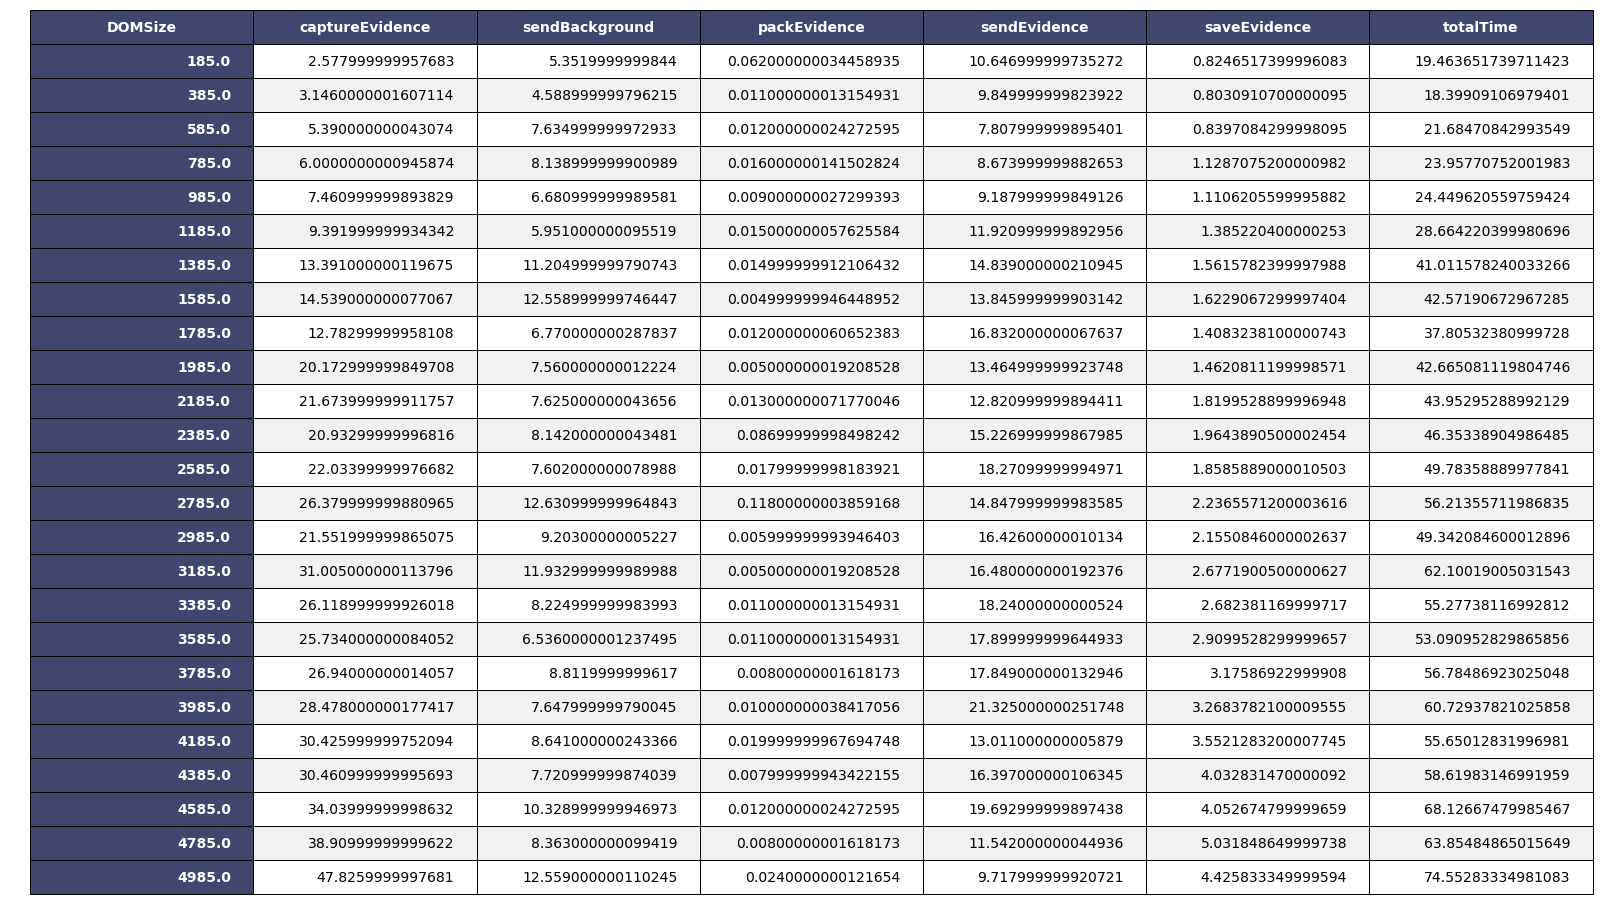

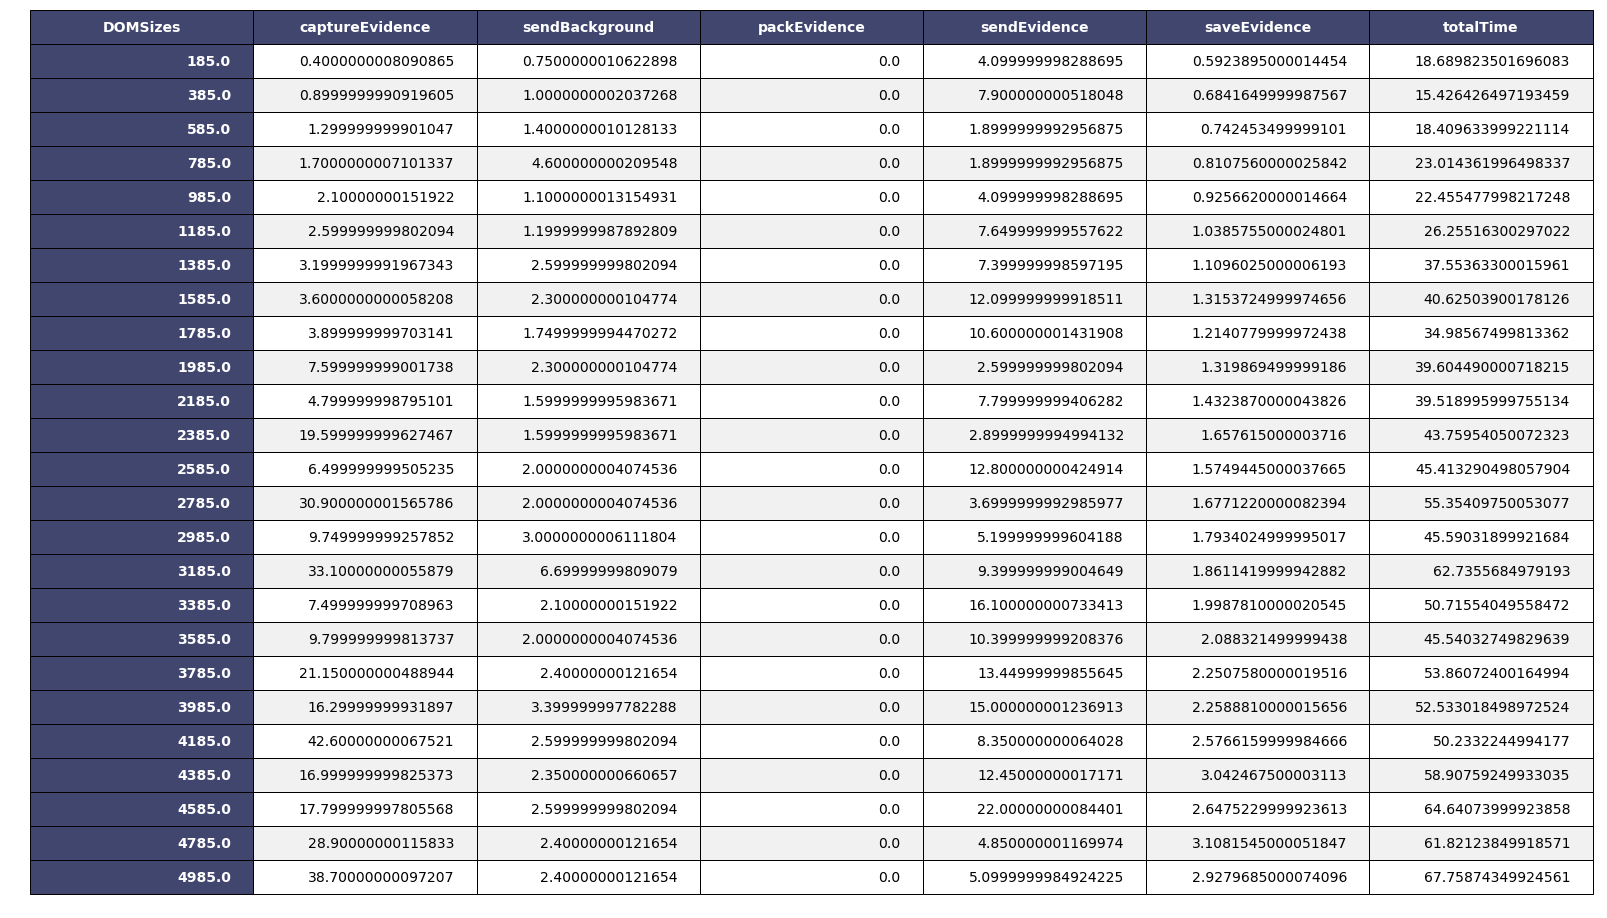

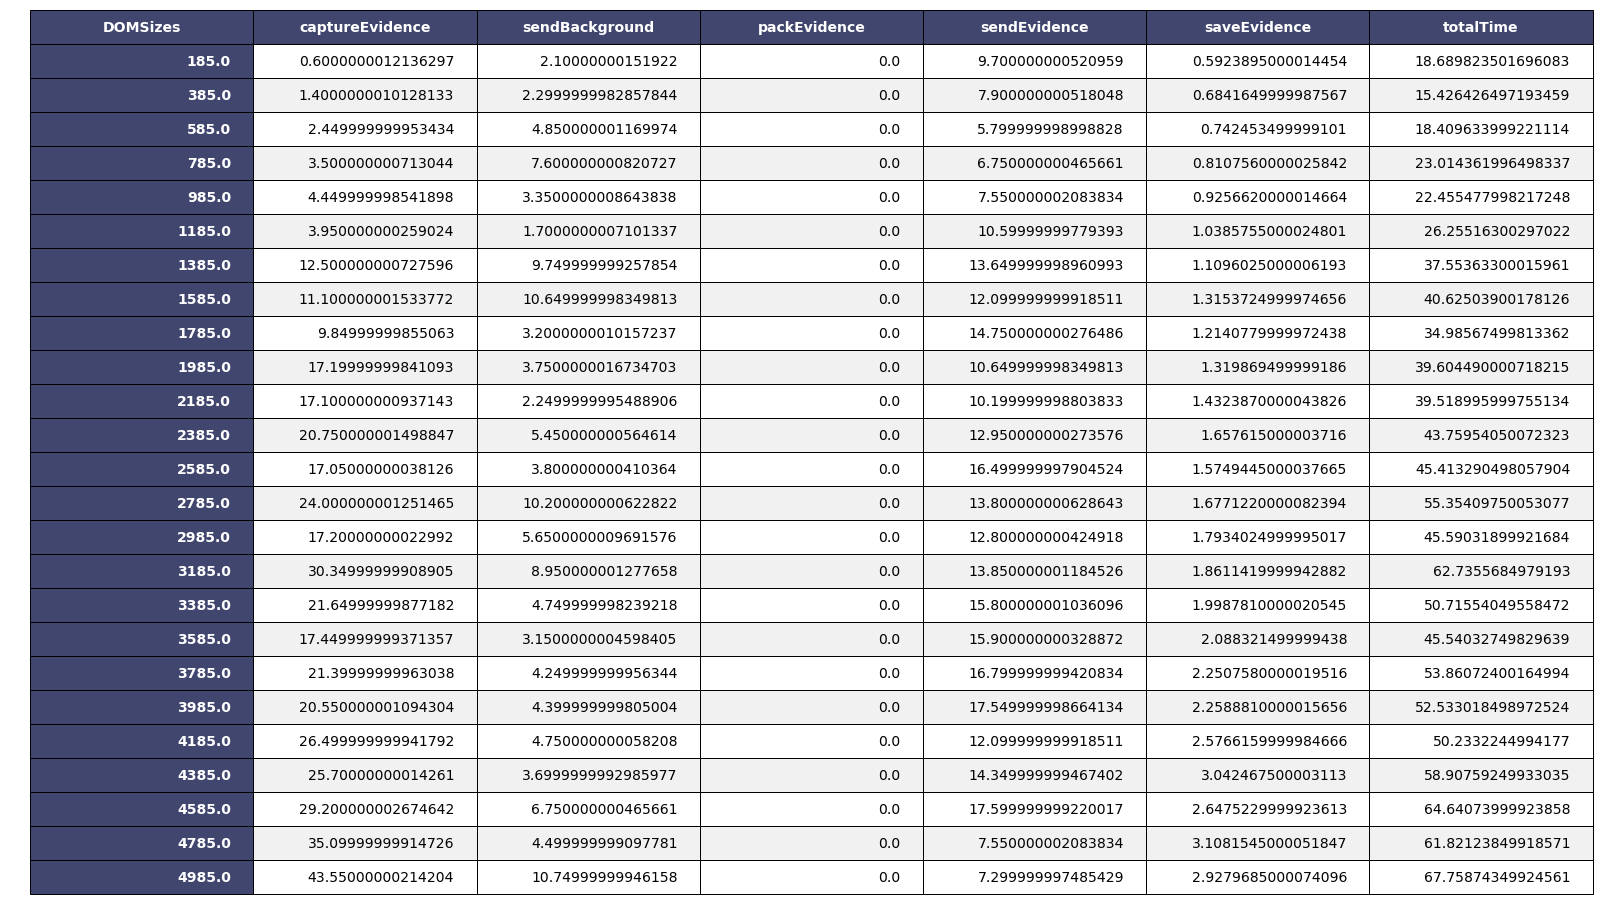

In [74]:
def main():
    timings = pd.read_csv("./timings/log.csv")
    df_timings = pd.DataFrame(timings)
    
    generateCorrelationGraph(df_timings)
    
    saveStatistics('max', df_timings)
    saveStatistics('min', df_timings)
    saveStatistics('mean', df_timings)
    saveStatistics('mode', df_timings)
    saveStatistics('median', df_timings)

In [75]:
main()

hello
